In [1]:
import zipfile
import pandas as pd
import os

zip_dosya_adi = 'archive.zip'

# dosyaları dışarı çıkarma işlemi
if os.path.exists(zip_dosya_adi):
    with zipfile.ZipFile(zip_dosya_adi, 'r') as zip_ref:
        zip_ref.extractall('cikolata_verileri')
    print("Dosyalar başarıyla çıkarıldı.")
else:
    print("Hata! archive.zip dosyası bulunamadı.")

#CSV dosyasını okuma
csv_yolu = 'cikolata_verileri/Chocolate Sales (2).csv'

try:
    df = pd.read_csv(csv_yolu)
    print("Veri seti başarıyla yüklendi! İşte ilk 5 satır:")
    print("--------------------------------------------")
    # Verinin ilk 5 satırını gösterir
    print(df.head())
except Exception as e:
    print(f"Veri yüklenirken bir hata oluştu: {e}")

Dosyalar başarıyla çıkarıldı.
Veri seti başarıyla yüklendi! İşte ilk 5 satır:
--------------------------------------------
     Sales Person    Country              Product        Date      Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04/01/2022   $5,320.00   
1     Van Tuxwell      India        85% Dark Bars  01/08/2022   $7,896.00   
2    Gigi Bohling      India  Peanut Butter Cubes  07/07/2022   $4,501.00   
3    Jan Morforth  Australia  Peanut Butter Cubes  27/04/2022  $12,726.00   
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24/02/2022  $13,685.00   

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


In [2]:
# veri temizleme 

# 1. 'Amount' sütunundaki $ ve , işaretlerini kaldırıp sayıya (float) çevirelim
df['Amount'] = df['Amount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Amount'] = pd.to_numeric(df['Amount'])

# 2. 'Date' sütununu tarih formatına çevirelim
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# 3. Sonuçları kontrol edelim
print("Yeni Veri Tipleri:")
print(df.dtypes)
print("\nTemizlenmiş ilk 5 satır:")
print(df.head())

Yeni Veri Tipleri:
Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object

Temizlenmiş ilk 5 satır:
     Sales Person    Country              Product       Date   Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco 2022-01-04   5320.0   
1     Van Tuxwell      India        85% Dark Bars 2022-08-01   7896.0   
2    Gigi Bohling      India  Peanut Butter Cubes 2022-07-07   4501.0   
3    Jan Morforth  Australia  Peanut Butter Cubes 2022-04-27  12726.0   
4  Jehu Rudeforth         UK  Peanut Butter Cubes 2022-02-24  13685.0   

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


In [6]:
# Verileri kullanarak temel analizler yapımı

# Ülkelere göre toplam satış tutarı (Hangi ülke en çok kazandırıyor?)
ulke_satis = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

# Ürünlere göre toplam gönderilen kutu sayısı (En popüler ürün hangisi?)
urun_adet = df.groupby('Product')['Boxes Shipped'].sum().sort_values(ascending=False)

# Satış temsilcilerine göre performans (En çok satışı kim yaptı?)
personel_performans = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

print("--- Ülke Bazlı Satışlar ---")
print(ulke_satis)
print("\n--- En Çok Satılan Ürünler (Kutu Sayısı) ---")
print(urun_adet)
print("\n--- Satış Temsilcisi Performansı ---")
print(personel_performans)

--- Ülke Bazlı Satışlar ---
Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64

--- En Çok Satılan Ürünler (Kutu Sayısı) ---
Product
50% Dark Bites          29810
Smooth Sliky Salty      26969
Eclairs                 26678
Spicy Special Slims     26662
Caramel Stuffed Bars    26576
Drinking Coco           26402
Milk Bars               25436
Peanut Butter Cubes     25339
White Choc              25158
After Nines             25156
Mint Chip Choco         25149
99% Dark & Pure         24818
70% Dark Bites          24524
85% Dark Bars           23828
Manuka Honey Choco      23736
Fruit & Nut Bars        23632
Orange Choco            23607
Organic Choco Syrup     23602
Raspberry Choco         21672
Baker's Choco Chips     21448
Almond Choco            20558
Choco Coated Almonds    19677
Name: Boxes Shipped, dtype: int64

--- Satış Temsilcisi Performan

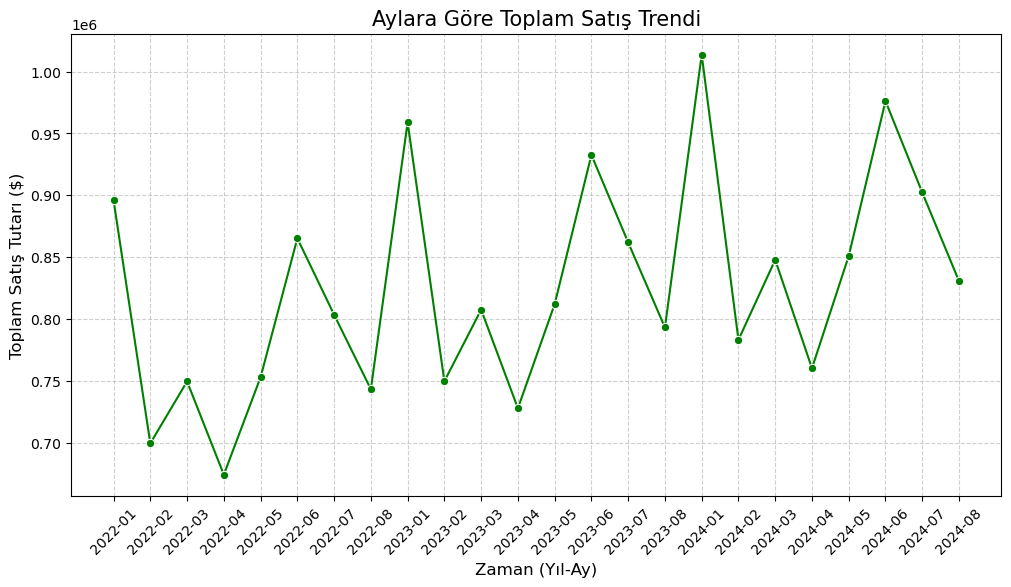

In [5]:
# zaman bazlı analiz ve görselleştirme aşaması

import matplotlib.pyplot as plt
import seaborn as sns

# Tarih sütunundan "Yıl-Ay" bilgisi yeni bir sütun olarak çıkarılır
df['Month_Year'] = df['Date'].dt.to_period('M').astype(str)

# Aylara göre toplam satışları gruplama
aylik_satis = df.groupby('Month_Year')['Amount'].sum().reset_index()

# Çizgi Grafiği (Line Chart) ile görselleştirme
plt.figure(figsize=(12, 6))
sns.lineplot(data=aylik_satis, x='Month_Year', y='Amount', marker='o', color='green')

# Grafik başlıkları ve düzenlemeler
plt.title('Aylara Göre Toplam Satış Trendi', fontsize=15)
plt.xlabel('Zaman (Yıl-Ay)', fontsize=12)
plt.ylabel('Toplam Satış Tutarı ($)', fontsize=12)
plt.xticks(rotation=45) # Tarihlerin okunması için eğiyoruz
plt.grid(True, linestyle='--', alpha=0.6) # Arka plana kılavuz çizgileri ekler

plt.show()